In [490]:
#install.packages("modi")
#install.packages("tidyverse")
library(modi)
library(tidyverse)
library(gtools)
library(stats)

## Exercise 1

In [491]:
x<-c(15.58,15.9,16,16.1,16.2)
p1<-c(0.15,0.21,0.35,0.15,0.14)
p2<-c(0.14,0.05,0.64,0.08,0.09)
mu1<-weighted.mean(x,p1)
si1<-weighted.var(x, p1, na.rm = FALSE)
mu2<-weighted.mean(x,p2)
si2<-weighted.var(x, p2, na.rm = FALSE)
cat("The first method returns \nmean:",round(mu1,digits=3),"\nvariance:",round(si1,digits=3))
cat("\nThe second method returns \nmean:",round(mu2,digits=3),"\nvariance:",round(si2,digits=3))

The first method returns 
mean: 15.959 
variance: 0.042
The second method returns 
mean: 15.962 
variance: 0.035

## Exercise 2

In [492]:
pdf<-function(data) dexp(data,1/30)
cdf<-function(data) pexp(data,1/30)
samp<-function(n) rexp(n,1/30)

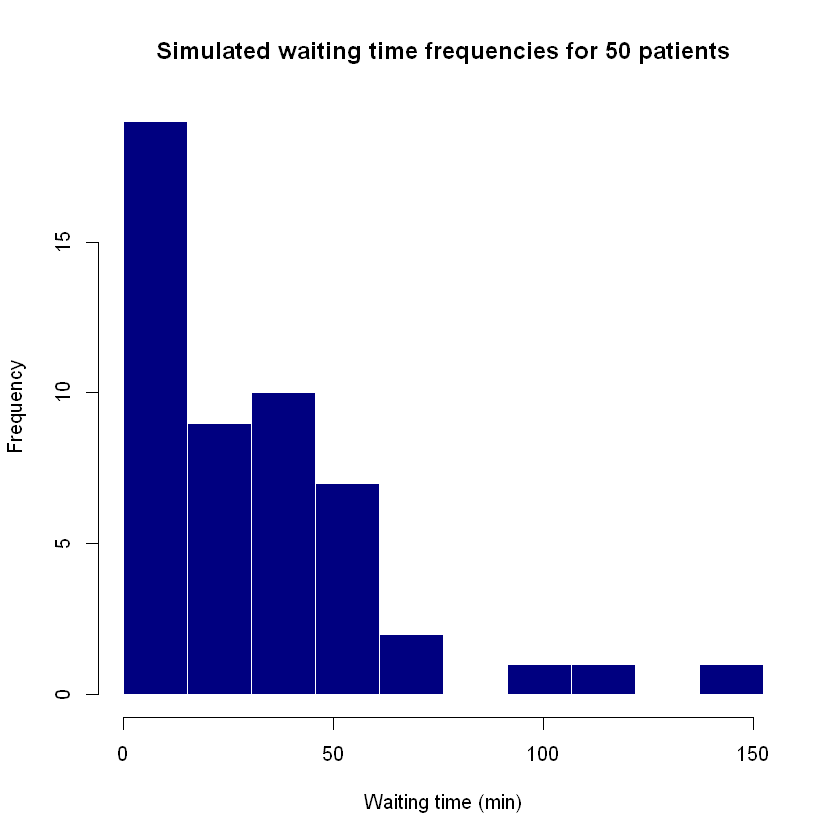

In [543]:
#a)
patients<-samp(50)
hist(patients, breaks=seq(0,max(patients),l=11),col="navyblue",xlab="Waiting time (min)",main="Simulated waiting time frequencies for 50 patients",border="white")

In [544]:
#B
cat("\nThe probability that one person will wait for less than 10 minute is:",round(cdf(10)*100,digits=2),"%")


The probability that one person will wait for less than 10 minute is: 28.35 %

In [545]:
#C evaluate the average waiting time from the simulated data and compare it with the expected value 
#(calculated from theory and by manipulating the probability distributions using R)

mean_data<-mean(patients)
cat("\nThe average waiting time from the simulated data is",round(mean_data,digits=1),"minutes")
time<-c(-rev(seq(0:1000)),0,seq(0:1000))
m<-weighted.mean(time,pdf(time))
cat("\nThe expected value of the probability distribution is",round(m,digits=1),"minutes.\nFrom theory it should be 30 minutes.")
err=(abs(30-mean_data)/30)*100
cat("\nThe percentual error of simulated data in comparison with the theory value is:",err,"%")


The average waiting time from the simulated data is 32.4 minutes
The expected value of the probability distribution is 29.5 minutes.
From theory it should be 30 minutes.
The percentual error of simulated data in comparison with the theory value is: 7.938555 %

In [546]:
#D
cat("\nThe probability for waiting more than one hour before being received is:",round((1-cdf(60))*100,digits=2),"%")


The probability for waiting more than one hour before being received is: 13.53 %

## Exercise 3

The probability that there is at least one error on a specific page is : 4.46 %

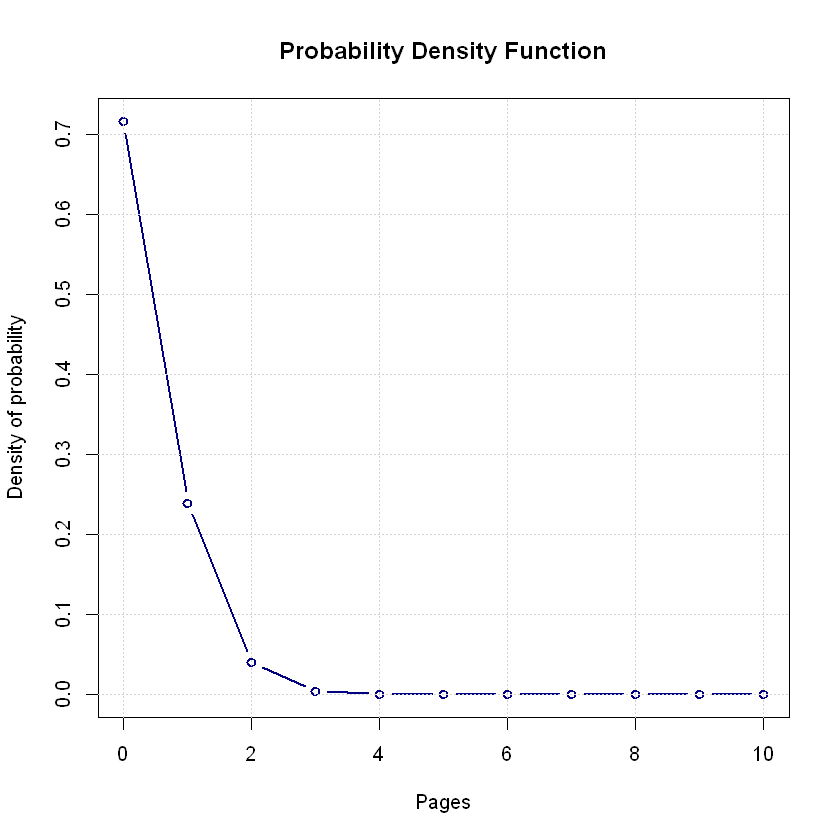

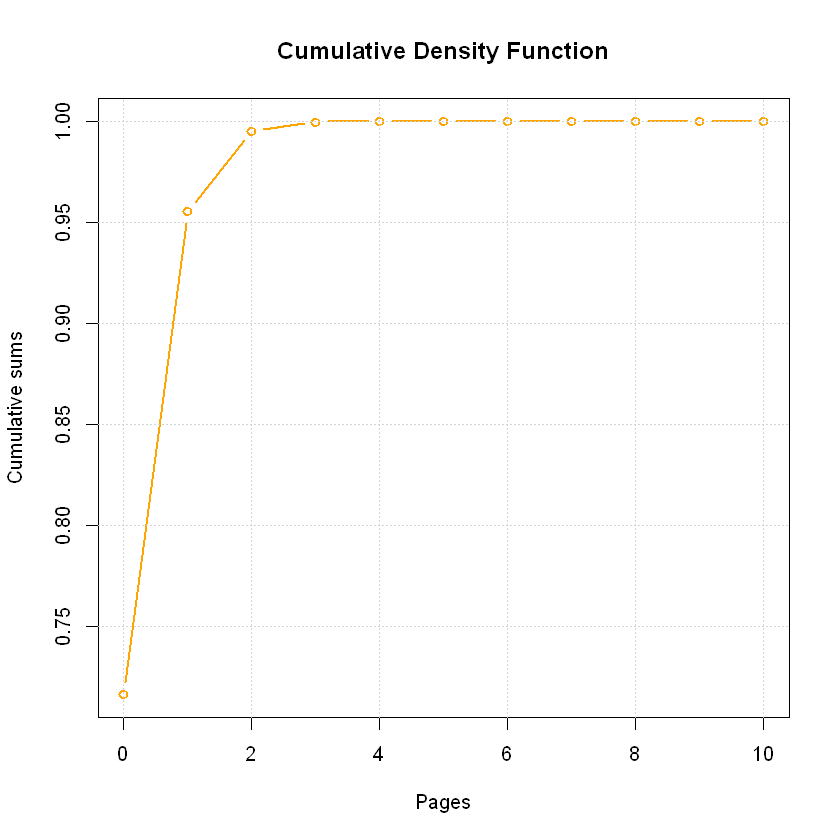

In [550]:
pdf_p<-function(data) dpois(data,1/3)
cdf_p<-function(data) ppois(data,1/3)
range<-seq(from=0,to=10,by=1)
cat("The probability that there is at least one error on a specific page is :",round((1-cdf_p(1))*100,digits=2),"%")
plot(range,pdf_p(range),col="navyblue",lwd="2",xlab="Pages",main="Probability Density Function",ylab="Density of probability",type="b")
grid()
plot(range,cdf_p(range),col="orange",lwd="2",xlab="Pages",main="Cumulative Density Function",ylab="Cumulative sums",type="b")
grid()

## Exercise 4

In [555]:
n_cards<-52
n_aces<-4
#The probability that we get an ace in the first 9 tries:
p_9 <- dbinom(1,9,n_aces/n_cards)
cat("The probability that at least 10 draws are needed is:",round((1-p_9)*100,digits=1),"%")

The probability that at least 10 draws are needed is: 63.5 %

 ## Exercise 5

In [378]:
#a) using the integrate() R function, determine the constant c (and verify it analytically)
f_0 <- function(t){
    if (1<t & t<2){
        (t-1)*(2-t)
    }
    else{
        0
    }
}
k<-integrate(f_0,lower=1,upper=2)$value
cat("The constant is",1/k) 

Warning message in if (1 < t & t < 2) {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"

The constant is 6

Analytically, 1=c$\int_{1}^{2}{(t-1)(2-t)dt}=c[\frac{3t^2}{2}-\frac{t^3}{3}-2t]^{2}_{1}=\frac{c}{6}$, therefore $c=6$.

Then, the analytical expression for the cumulative function is:
$$
cdf(x)=
\begin{cases}
9x^2-2x^3-12x + c \textit{ if 1<x<2 }\\
0 \textit{   else}
\end{cases}
\textit{   with } c=5
$$
Its inverse it is not straightforward to calculate, it will be use R to do it.

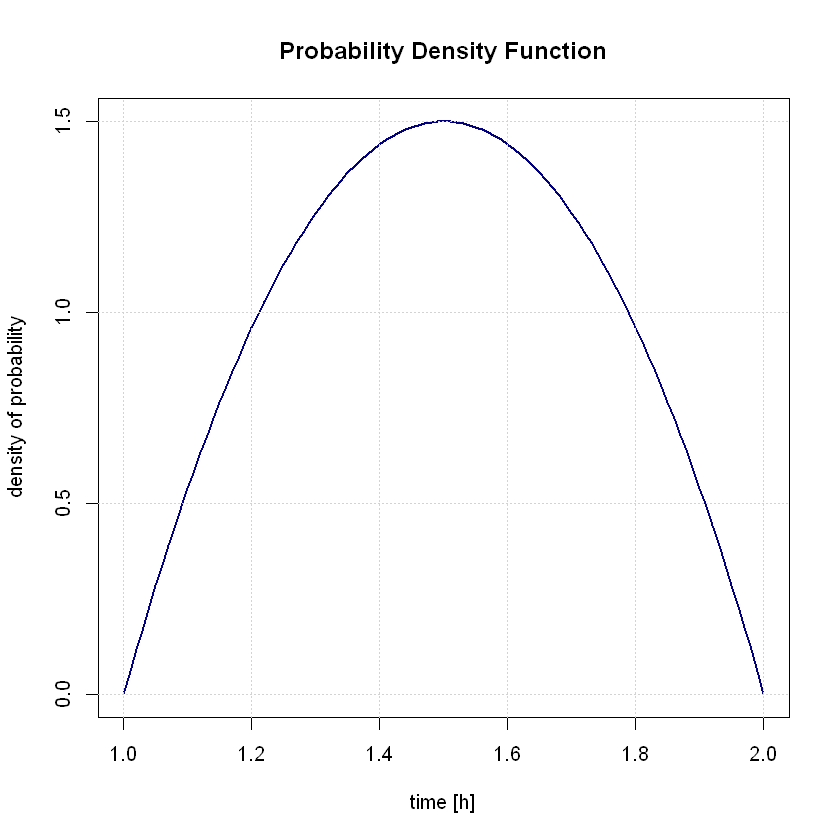


Quantiles with the first method:
 25 %: 1.32
 50 %: 1.49
 75 %: 1.67
Quantiles with the second method:
 25 %: 1.326348
 50 %: 1.5
 75 %: 1.673652

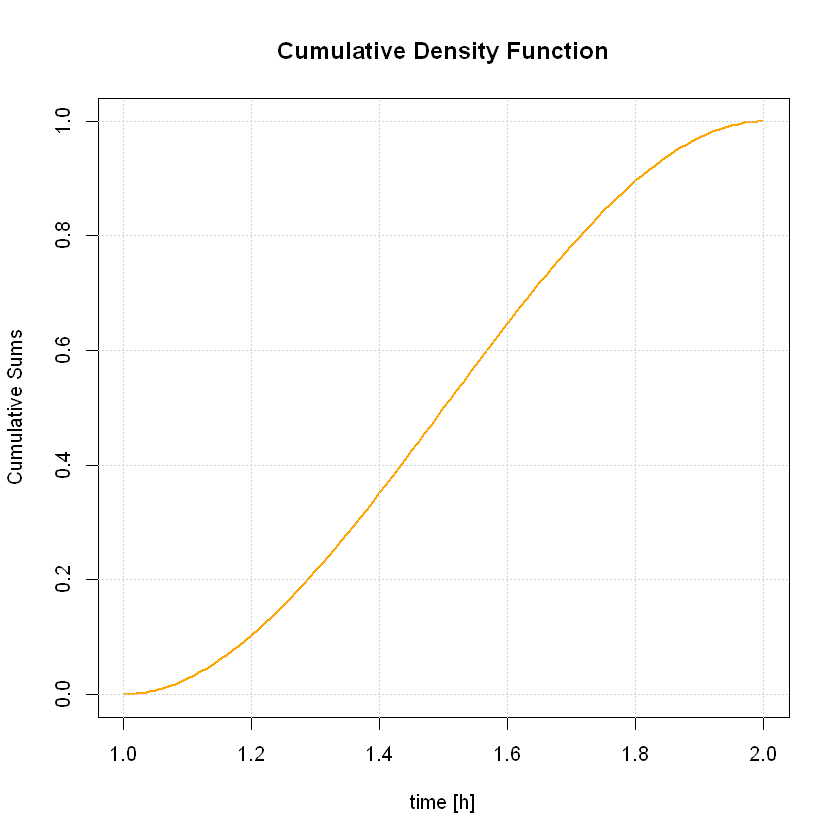

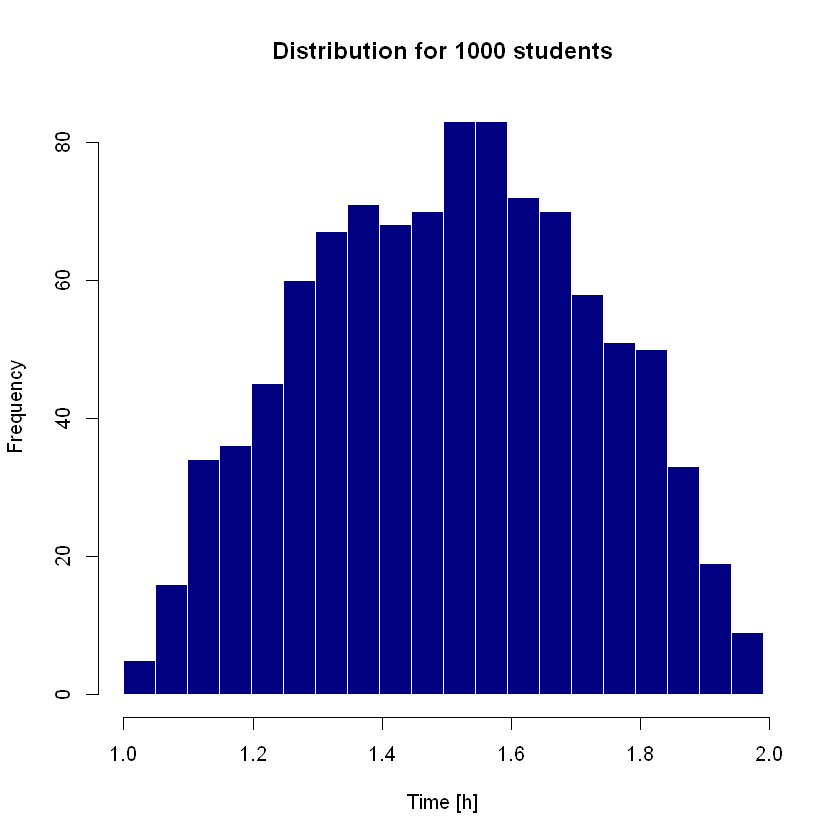

In [572]:
#b) write the set of four R functions and plot the pdf and cdf, respectively

#PROBABILITY DENSITY FUNCTION

f <- function(t){
    if (t>1 & t<2){
        r<-6*(t-1)*(2-t)
    } else {
        r<-0
    }
    return(r)
}

rangz<-seq(0:99)/100+1
range<-c(1,rangz) #101 steps, from 1 hour to 2 hours
pdf<-vector()
index=1
for (i in range){
    pdf[index]<-f(i)
    index=index+1
}
plot(range,pdf,col="navyblue",lwd="2",xlab="time [h]",ylab="density of probability",main="Probability Density Function",type="l")
grid()

#CUMULATIVE DENSITY FUNCTION

cumulative<-function(t1,t2){ 
    f_range <- function(t){ #function defined in range [1,2]
        r<-6*(t-1)*(2-t)
        return(r)
    }
    a=t1/60
    b=t2/60
    return(integrate(f_range,lower=a,upper=b)$value)
}
#Now I build a vector for the plot
cdf<-vector()
index2=1
for (i in range){
    cdf[index2]<-cumulative(60,i*60)
    index2=index2+1
}

plot(range,cdf,col="orange",lwd="2",xlab="time [h]",ylab="Cumulative Sums",main="Cumulative Density Function",type="l")
grid()

#quantiles

#First method: a simple function can be written using the cdf list created to plot the cumulative function
qnt<-function(p,cdf,range){
    q<-cdf[cdf<p]
    l<-length(q)
    return(range[range=l])
}
cat("\nQuantiles with the first method:")
for (i in 1:3){
    a<-qnt(i/4,cdf,range)
    cat("\n",(i/4)*100,"%:",a)
}

#Second method: the quantile function is the inverse of the cumulative function. 

cdf_anal <- function(t) {
    a<-9*t^2-2*t^3-12*t + 5
    return (a)}

quantile_f <- function(y) {
    if (y>0 & y<1){
        a<-uniroot(function(t) cdf_anal(t) - y, interval = c(1,2), extendInt = "yes")$root
    }
    else{
        a<-0
    }
    return (a)}
                                          
cat("\nQuantiles with the second method:")
for (i in 1:3){
    a<-quu(i/4)
    cat("\n",(i/4)*100,"%:",a)
}                                      

#SAMPLINGS GENERATION FUNCTION
samplings<-function(n){
    random<-runif(n)
    collect<-vector()
    for (i in 1:n){
        collect[i]<-quantile_f(random[i])
    }
    return(collect)
}
points<-samplings(1000)
hist(points,breaks=seq(1,max(points),l=21),col="navyblue",xlab="Time [h]",main="Distribution for 1000 students",border="white")


In [568]:
#c) evaluate the probability that the student will finish the aptitude test in more than 75 minutes. 
#And that it will take 90 and 120 minutes
cat("\nThe probability that the student will finish the test in more than 75 min is:",round((cumulative(75,120))*100,digits=2),"%")
cat("\nThe probability that the student will take between 90 and 120 minutes is:",round((cumulative(90,120))*100,digits=2),"%")


The probability that the student will finish the test in more than 75 min is: 84.37 %
The probability that the student will take between 90 and 120 minutes is: 50 %

## Exercise 6

For the quantile and sampling functions, these functions are used:
$$cdf(x)=\begin{cases}
\int_{1}^{x}{\frac{2}{t^2}}dt=2[-\frac{1}{t}]^{x}_{1} + c = 2-\frac{2}{x} +c   \textit{ if 1<x<2 }\\
0    \textit{   else  }
\end{cases}
\textit{ with } c=0
$$
$$
cdf^{-1}(y)=\begin{cases}
\frac{2}{2-y} \textit{   if 0<y<1}\\
0 \textit{  else}
\end{cases}
$$

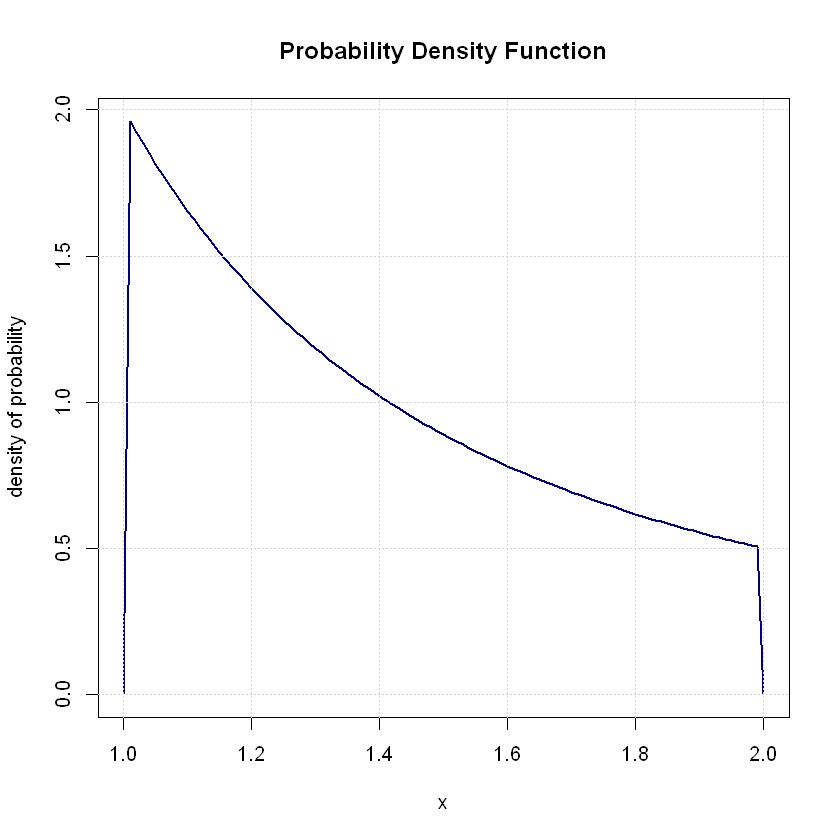


Quantiles with the first method:
 25 %: 1.14
 50 %: 1.33
 75 %: 1.59
Quantiles with the second method:
 25 %: 1.142857
 50 %: 1.333333
 75 %: 1.6

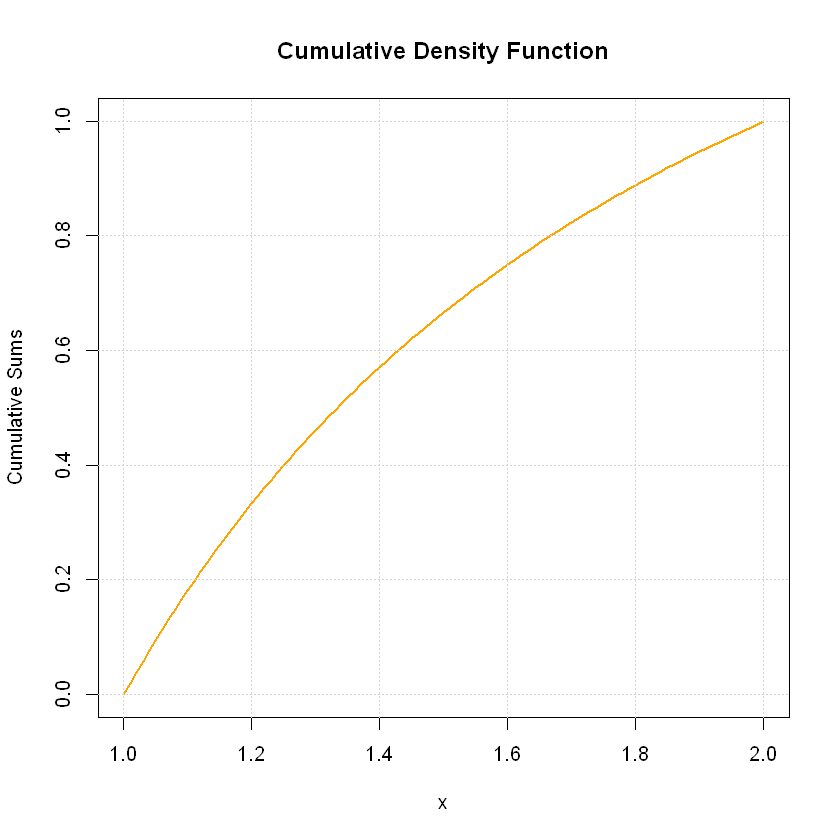

In [574]:
#a) write the set of four R functions and plot the pdf and cdf, respectively

#PROBABILITY DENISTY FUNCTION
#this function construct the pdf of the distribution of the lifetime, the 10*4 factor is normalized to 1
dlifetime<-function(x){
    if (x>1 & x<2){
        a<-2/(x^2)
    }
    else{
        a<-0
    }
    return(a)
}
rangz<-seq(0:99)/100+1
range<-c(1,rangz) #101 steps, from 1 to 2
pdf1<-vector() #vector fot the plot
index=1
for (i in range){
    pdf1[index]<-dlifetime(i)
    index=index+1
}

plot(range,pdf1,col="navyblue",lwd="2",main="Probability Density Function",xlab="x",ylab="density of probability",type="l")
grid()

#CUMULATIVE DENSITY FUNCTION

plifetime<-function(m1,m2){ #it takes kilometers in input and then normalize the value before calculate the cdf
    dlif_red<-function(x){ #function defined only for 1<t<2
        a<-2/(x^2)
        return(a)
    }
    a<-m1/(10^4)
    b<-m2/(10^4)
    return(integrate(dlif_red,lower=a,upper=b)$value)
}

#Now I build a vector for the plot
cdf1<-vector()
index2=1
for (i in range){
    cdf1[index2]<-plifetime(10^4,i*10^4)
    index2=index2+1
}

plot(range,cdf1,col="orange",lwd="2",main="Cumulative Density Function",xlab="x",ylab="Cumulative Sums",type="l")
grid()

#QUANTILES FUNCTION

#First method: a simple function can be written using the cdf1 list created to plot the cumulative function
qnt<-function(p,cdf,range){
    q<-cdf[cdf<p]
    l<-length(q)
    return(range[range=l])
}
cat("\nQuantiles with the first method:")
for (i in 1:3){
    a<-qnt(i/4,cdf1,range)
    cat("\n",(i/4)*100,"%:",a)
}  

#Second method: the quantile function is the inverse of the cumulative function. 
cdf_analytical<-function(m2){ 
    b<-m2*(10^(-4))
    return(2-2/b)
}
qlifetime<-function(y){
    if (y>0 & y<1){
        a<-2/(2-y)
    }
    else{
        a<-0
    }
    return(a)
}
cat("\nQuantiles with the second method:")
for (i in 1:3){
    a<-qlifetime(i/4)
    cat("\n",(i/4)*100,"%:",a)
}  

#SAMPLINGS GENERATION FUNCTION
samp<-function(n){
    random<-runif(n)
    return(qlifetime(random))
}

In [575]:
#b) determine the probability that tires will last less than 15000 km
cat("The probability that tires will last less than 15000 km is:",round(plifetime(10000,15000)*100,digits=2),"%")

The probability that tires will last less than 15000 km is: 66.67 %

Warning message in if (y > 0 & y < 1) {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"Warning message in if (x > 1 & x < 2) {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"Warning message in if (x > 1 & x < 2) {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"


The mean value of the sample of 3000 random variables is: 1.29
The variance is: 0.06

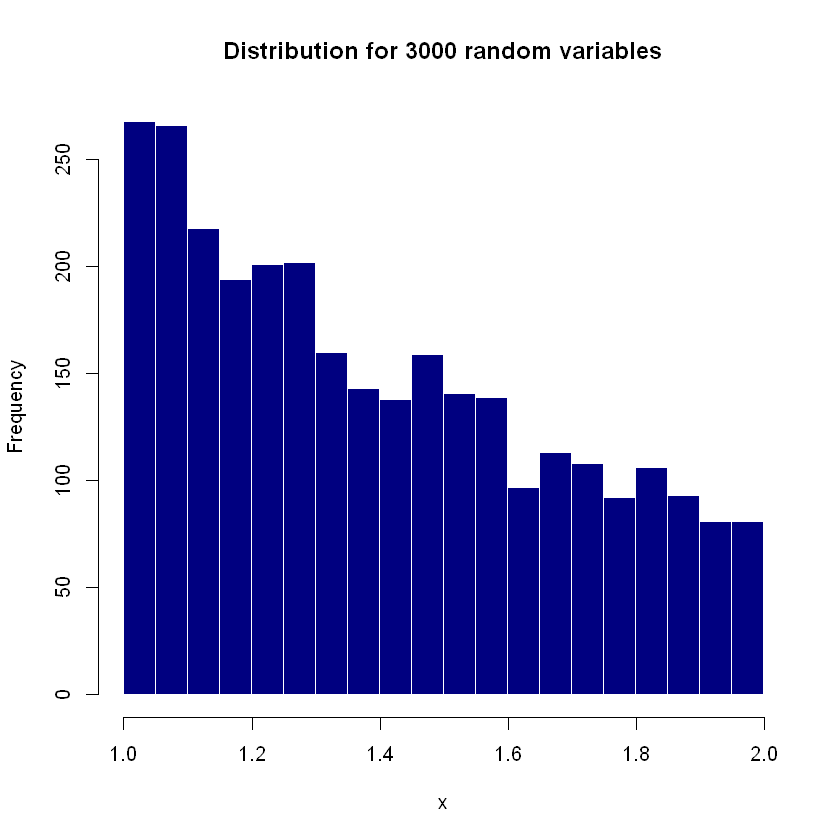

In [578]:
data<-samp(3000)
hist(data, breaks=seq(1,max(data),l=21),col="navyblue",xlab="x",main="Distribution for 3000 random variables",border="white")

E<-weighted.mean(data,dlifetime(data))
E2<-weighted.mean(data^2,dlifetime(data))
cat("\nThe mean value of the sample of 3000 random variables is:",round(E,digits=2))
cat("\nThe variance is:",round(E2-(E)^2,digits=2))